In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/PHL_dataset.csv')

print(df.head())
df.info()

                  P_NAME   P_DETECTION P_DISCOVERY_FACILITY  P_YEAR  \
0  OGLE-2016-BLG-1227L b  Microlensing                 OGLE    2020   
1           Kepler-276 c       Transit               Kepler    2013   
2           Kepler-829 b       Transit               Kepler    2016   
3               K2-283 b       Transit                   K2    2018   
4           Kepler-477 b       Transit               Kepler    2016   

     P_UPDATE  P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX  P_MASS_LIMIT  \
0  2020-04-02  250.00            -120.0             413.0             0   
1  2018-09-25   16.60              -3.6               4.4             0   
2  2019-04-16    5.10               NaN               NaN             0   
3  2019-09-05   12.20               NaN               NaN             0   
4  2019-04-16    4.94               NaN               NaN             0   

      P_MASS_ORIGIN  ...  S_ABIO_ZONE  S_TIDAL_LOCK  P_HABZONE_OPT  \
0              Mass  ...          NaN      0.214133 

In [2]:
df.shape

(5599, 118)

In [3]:
df.columns

Index(['P_NAME', 'P_DETECTION', 'P_DISCOVERY_FACILITY', 'P_YEAR', 'P_UPDATE',
       'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX', 'P_MASS_LIMIT',
       'P_MASS_ORIGIN',
       ...
       'S_ABIO_ZONE', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_HABZONE_CON',
       'P_TYPE_TEMP', 'P_HABITABLE', 'P_ESI', 'S_CONSTELLATION',
       'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG'],
      dtype='object', length=118)

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
cols_to_keep = [
    'P_HABITABLE',    # The "Answer Key": 0 = Non-Habitable, 1 = Conservatively Habitable, 2 = Optimistically Habitable.

    # --- PLANET FEATURES (The Environment) ---
    'P_RADIUS',       # Planet Radius (in Earth radii).
    'P_MASS',         # Planet Mass (in Earth masses).
    'P_GRAVITY',      # Surface Gravity.
    'P_PERIOD',       # Orbital Period (Year length).
   ' P_SEMI_MAJOR_AXIS',
    # 'P_FLUX',         # Insolation Flux. The total energy received from the star relative to Earth from sun.
    'P_TEMP_EQUIL',   # Equilibrium Temperature (Kelvin).

    # --- STAR FEATURES (The Source of Energy) ---
    'S_MASS',         # Star Mass. Determines the star's lifespan.
    'S_RADIUS',       # Star Radius. Used with Luminosity to determine the star's energy density and size of the Habitable Zone.
    'S_TEMPERATURE',  # Star Temperature (Effective). Determines the type of light emitted.
    'S_LUMINOSITY',   # Star Luminosity. The total power output of the star in comp.to sun.
]
df = df[[col for col in cols_to_keep if col in df.columns]]

In [6]:
df.shape

(5599, 10)

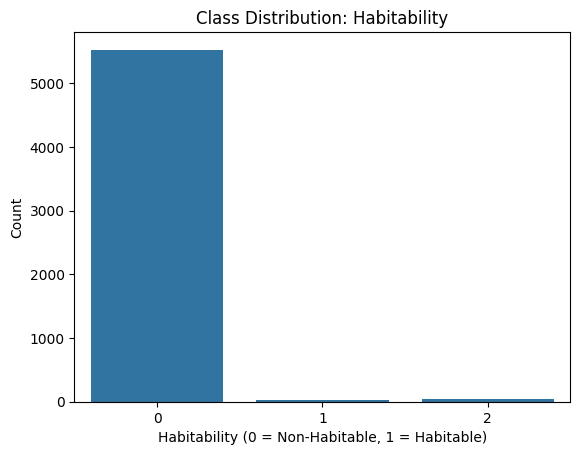

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='P_HABITABLE', data=df)
plt.title("Class Distribution: Habitability")
plt.xlabel("Habitability (0 = Non-Habitable, 1 = Habitable)")
plt.ylabel("Count")
plt.show()

In [8]:
# FIX for Cell 7
df = df.dropna(subset=['P_HABITABLE']) # Ensure no NaNs in target
df['P_HABITABLE'] = df['P_HABITABLE'].apply(lambda x: 1 if x > 0 else 0) # Safer logic

In [9]:
df['P_HABITABLE'].value_counts()

,count
P_HABITABLE,
0,5529
1,70


Identify missing values

In [10]:
missing_values = df.isnull().sum()
missing_percentage = 100 * df.isnull().sum() / len(df)

missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

print('Columns with Missing Values :')
print(missing_df.head(30))

Columns with Missing Values :
               Missing Values  Percentage
P_PERIOD                  249    4.447223
P_TEMP_EQUIL              234    4.179318
S_LUMINOSITY              233    4.161457
S_RADIUS                  232    4.143597
S_TEMPERATURE             219    3.911413
P_RADIUS                    7    0.125022
P_GRAVITY                   7    0.125022
P_MASS                      7    0.125022
S_MASS                      4    0.071441


In [11]:
df.head()

,P_HABITABLE,P_RADIUS,P_MASS,P_GRAVITY,P_PERIOD,P_TEMP_EQUIL,S_MASS,S_RADIUS,S_TEMPERATURE,S_LUMINOSITY
0,0,13.90,250.00,1.293929,NaN,NaN,0.10,NaN,NaN,NaN
1,0,2.90,16.60,1.973841,31.884000,541.98483,1.10,1.03,5779.0,0.814704
2,0,2.11,5.10,1.145527,6.883376,1001.11710,0.98,0.97,5698.0,1.096478
3,0,3.52,12.20,0.984633,1.921036,1104.46820,0.89,0.82,5060.0,0.299226
4,0,2.07,4.94,1.152886,11.119907,681.30334,0.87,0.79,5240.0,0.424620


In [12]:
df.isnull().sum()

,0
P_HABITABLE,0
P_RADIUS,7
P_MASS,7
P_GRAVITY,7
P_PERIOD,249
P_TEMP_EQUIL,234
S_MASS,4
S_RADIUS,232
S_TEMPERATURE,219
S_LUMINOSITY,233


In [13]:
df = df[df.isnull().mean(axis=1) < 0.5]


In [14]:
df.shape

(5399, 10)

In [15]:
df.describe()

,P_HABITABLE,P_RADIUS,P_MASS,P_GRAVITY,P_PERIOD,P_TEMP_EQUIL,S_MASS,S_RADIUS,S_TEMPERATURE,S_LUMINOSITY
count,5399.000000,5394.000000,5394.000000,5394.000000,5.350000e+03,5363.000000,5397.000000,5365.000000,5378.000000,5.364000e+03
mean,0.012965,5.560155,430.631404,3.922390,7.994082e+04,793.260357,0.969546,1.545722,5430.829775,8.010706e+00
std,0.113135,5.294594,2396.200472,14.166349,5.498596e+06,484.315432,0.415540,4.198472,1778.081019,1.111004e+02
min,0.000000,0.310000,0.020000,0.038086,9.070629e-02,1.084914,0.010000,0.010000,415.000000,8.128305e-07
25%,0.000000,1.750000,3.955000,1.024179,4.465382e+00,456.977115,0.810000,0.780000,4943.250000,3.580964e-01
50%,0.000000,2.720000,8.400000,1.165000,1.156951e+01,727.820170,0.950000,0.960000,5555.000000,8.609960e-01
75%,0.000000,11.265000,135.296685,1.526421,4.150555e+01,1049.990350,1.100000,1.240000,5902.000000,2.060630e+00
max,1.000000,77.342000,89700.000000,387.976070,4.020000e+08,7800.730100,10.940000,109.460000,57000.000000,6.309573e+03


In [16]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5399 entries, 1 to 5597
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   P_HABITABLE    5399 non-null   int64  
 1   P_RADIUS       5394 non-null   float64
 2   P_MASS         5394 non-null   float64
 3   P_GRAVITY      5394 non-null   float64
 4   P_PERIOD       5350 non-null   float64
 5   P_TEMP_EQUIL   5363 non-null   float64
 6   S_MASS         5397 non-null   float64
 7   S_RADIUS       5365 non-null   float64
 8   S_TEMPERATURE  5378 non-null   float64
 9   S_LUMINOSITY   5364 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 464.0 KB


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
y = df['P_HABITABLE']
X = df.drop(columns=['P_HABITABLE'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [18]:
from sklearn.impute import SimpleImputer
import pandas as pd

imputer = SimpleImputer(strategy='median')

imputer.fit(X_train)

# The output is a numpy array, so we wrap it back into a DataFrame
X_train_imputed = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Verification
print("Missing values in Train:", X_train_imputed.isnull().sum().sum())
print("Missing values in Test:", X_test_imputed.isnull().sum().sum())

Missing values in Train: 0
Missing values in Test: 0


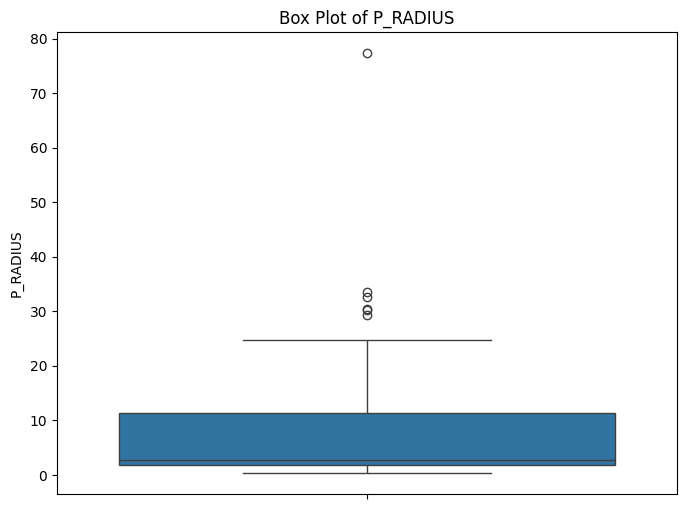

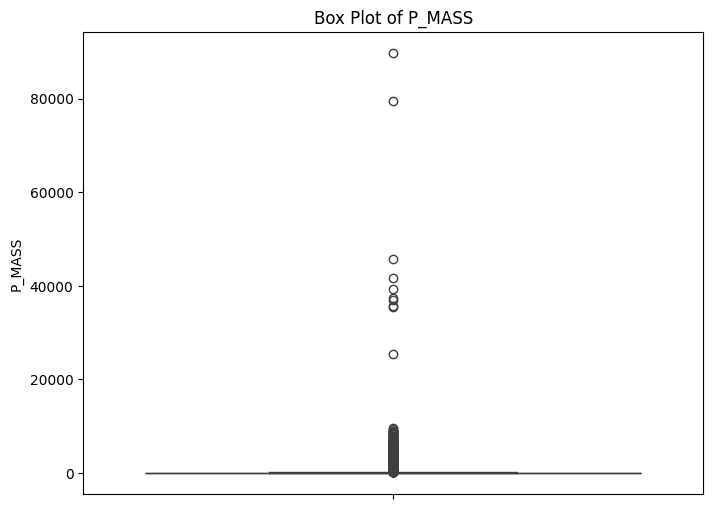

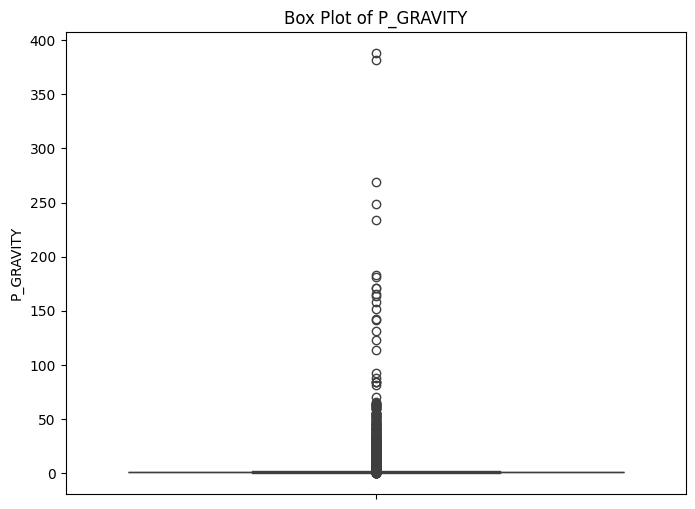

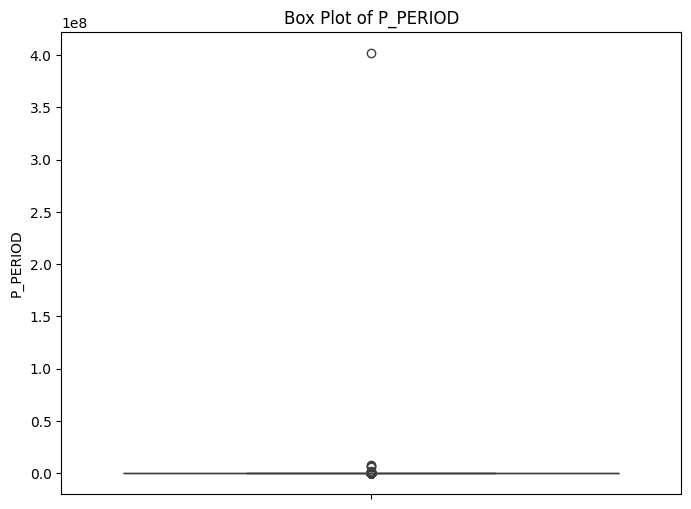

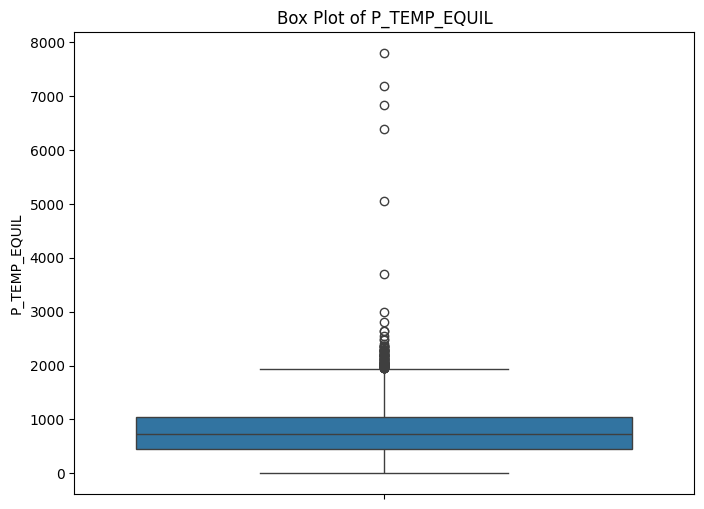

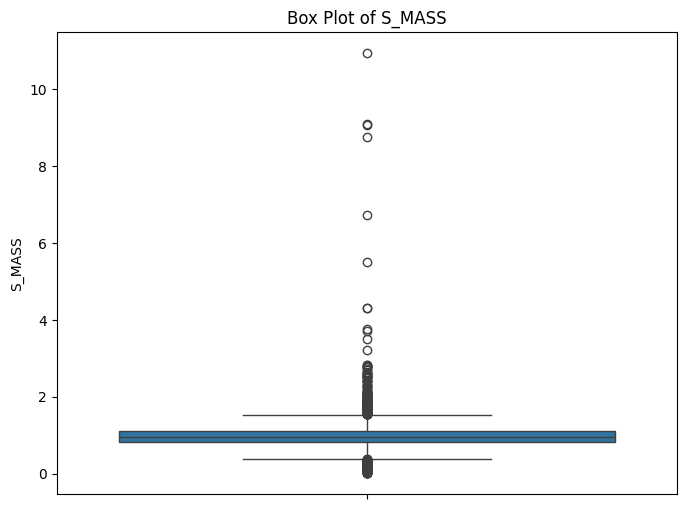

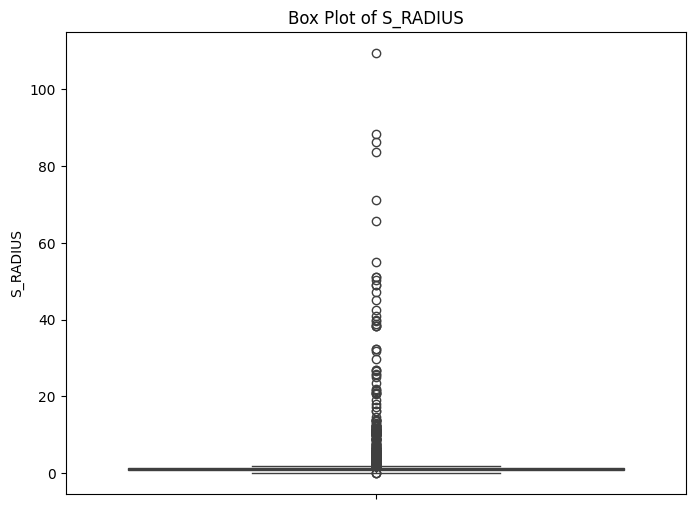

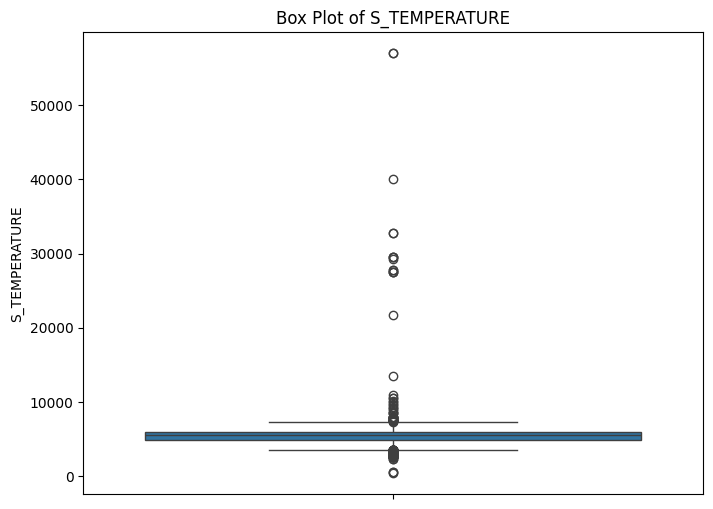

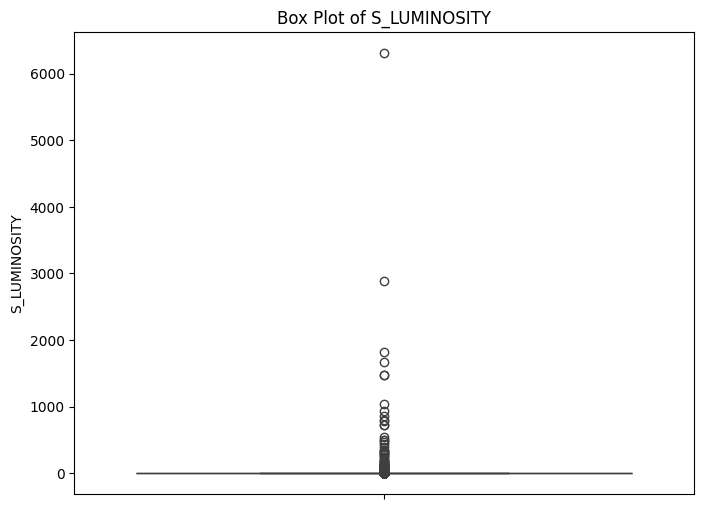

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Based on the previous outlier detection, these columns show significant outliers
for col in X_train_imputed:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()


In [20]:
#Calculate Q1, Q3, and IQR on TRAINING Data Only
Q1 = X_train_imputed.quantile(0.25)
Q3 = X_train_imputed.quantile(0.75)
IQR = Q3 - Q1

#Define Lower and Upper Limits
lower_limits = Q1 - 1.5 * IQR
upper_limits = Q3 + 1.5 * IQR

#Apply Capping to BOTH Train and Test
X_train_capped = X_train_imputed.clip(lower=lower_limits, upper=upper_limits, axis=1)
X_test_capped = X_test_imputed.clip(lower=lower_limits, upper=upper_limits, axis=1)

# Verification
print("P_MASS Example:")
print(f"Max Value Before Capping: {X_train_imputed['P_MASS'].max()}")
print(f"Max Value After Capping:  {X_train_capped['P_MASS'].max()}")
print(f"Upper Limit Used:         {upper_limits['P_MASS']}")

P_MASS Example:
Max Value Before Capping: 45700.0
Max Value After Capping:  327.9314999999999
Upper Limit Used:         327.9314999999999


In [21]:
skewness = X_train_capped.skew()
skewed_cols = skewness[abs(skewness) > 1].index.tolist()

# 2. Apply Log Transform to BOTH Train and Test
X_train_log = X_train_capped.copy()
X_test_log = X_test_capped.copy()

X_train_log[skewed_cols] = np.log1p(X_train_capped[skewed_cols])
X_test_log[skewed_cols] = np.log1p(X_test_capped[skewed_cols])


In [22]:
X_train_log.corr()

,P_RADIUS,P_MASS,P_GRAVITY,P_PERIOD,P_TEMP_EQUIL,S_MASS,S_RADIUS,S_TEMPERATURE,S_LUMINOSITY
P_RADIUS,1.000000,0.964536,0.387024,0.311894,-0.086609,0.390913,0.456750,0.175985,0.383290
P_MASS,0.964536,1.000000,0.572839,0.317481,-0.108190,0.375950,0.442076,0.146044,0.369589
P_GRAVITY,0.387024,0.572839,1.000000,0.174847,-0.106150,0.188013,0.225554,-0.002618,0.187915
P_PERIOD,0.311894,0.317481,0.174847,1.000000,-0.771363,0.164522,0.221147,0.039112,0.208119
P_TEMP_EQUIL,-0.086609,-0.108190,-0.106150,-0.771363,1.000000,0.314753,0.269203,0.381184,0.319824
S_MASS,0.390913,0.375950,0.188013,0.164522,0.314753,1.000000,0.879382,0.747052,0.841111
S_RADIUS,0.456750,0.442076,0.225554,0.221147,0.269203,0.879382,1.000000,0.594684,0.895724
S_TEMPERATURE,0.175985,0.146044,-0.002618,0.039112,0.381184,0.747052,0.594684,1.000000,0.673658
S_LUMINOSITY,0.383290,0.369589,0.187915,0.208119,0.319824,0.841111,0.895724,0.673658,1.000000


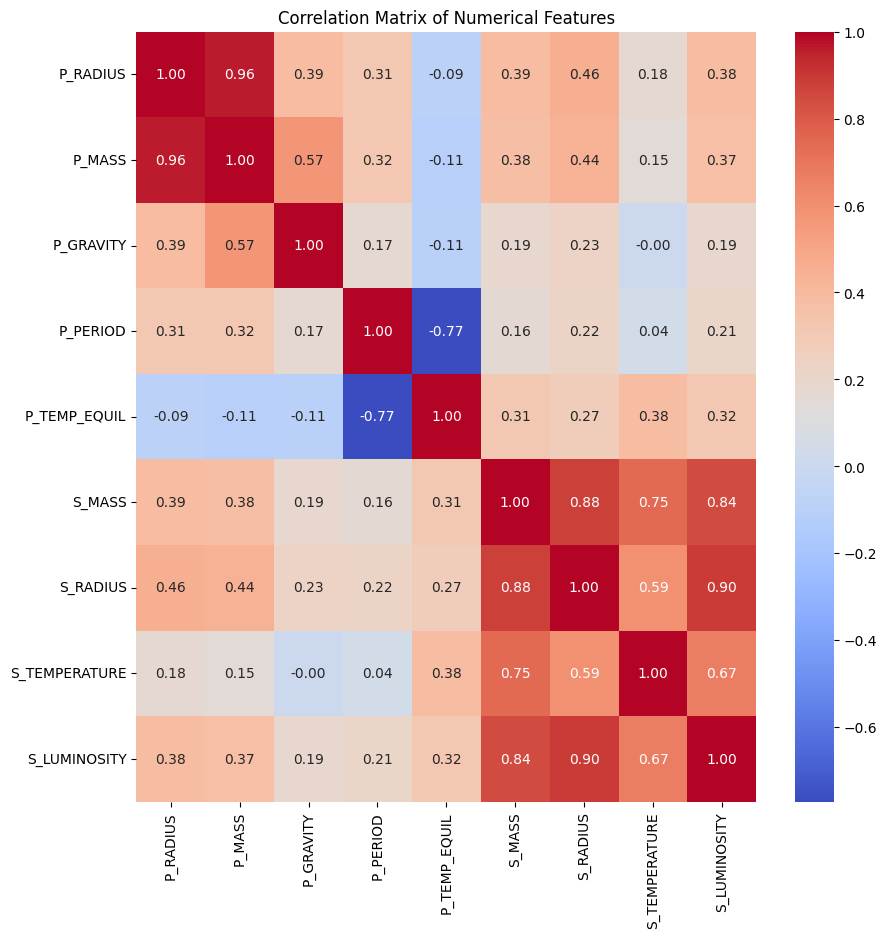

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(X_train_log.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_log)
X_test_scaled = scaler.transform(X_test_log)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.45504429 0.25485342]


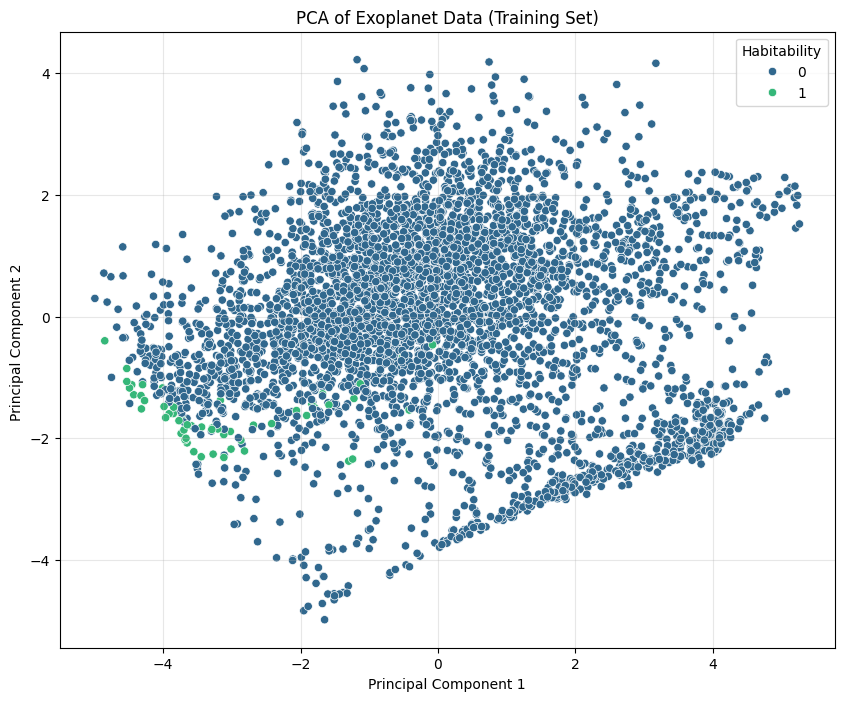

In [25]:
# Ensure you use y_train because X_pca corresponds to the Training set
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette='viridis')

# Add informative labels
plt.title('PCA of Exoplanet Data (Training Set)')
plt.xlabel(f'Principal Component 1')
plt.ylabel(f'Principal Component 2 ')
plt.legend(title='Habitability', loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()

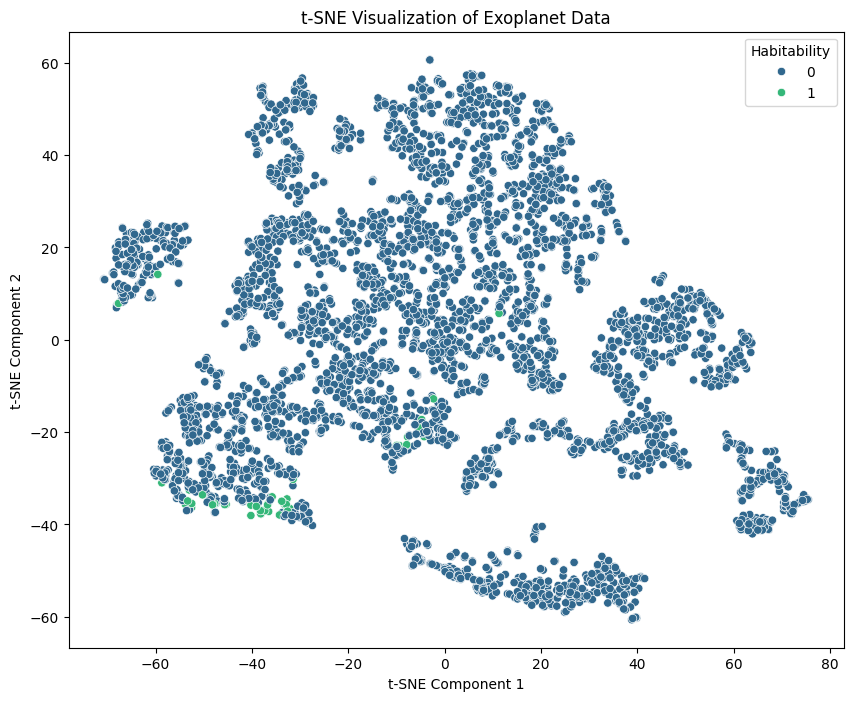

In [26]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Initialize t-SNE
# perplexity: represents the number of neighbors to consider (usually 30-50).
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# 2. Fit and Transform the scaled training data
X_tsne = tsne.fit_transform(X_train_scaled)

# 3. Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_train, palette='viridis')

plt.title('t-SNE Visualization of Exoplanet Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Habitability')
plt.show()

Baseline model


In [27]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n===== {name} =====")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [28]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train_scaled, y_train)

evaluate_model(dummy, X_test_scaled, y_test, "Baseline Dummy Classifier")



===== Baseline Dummy Classifier =====
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1066
           1       0.00      0.00      0.00        14

    accuracy                           0.99      1080
   macro avg       0.49      0.50      0.50      1080
weighted avg       0.97      0.99      0.98      1080

ROC-AUC: 0.5
Confusion Matrix:
 [[1066    0]
 [  14    0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    class_weight="balanced",
    max_iter=1000,
    random_state=42
)

log_reg.fit(X_train_scaled, y_train)
evaluate_model(log_reg, X_test_scaled, y_test, "Logistic Regression")



===== Logistic Regression =====
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1066
           1       0.27      1.00      0.43        14

    accuracy                           0.97      1080
   macro avg       0.64      0.98      0.71      1080
weighted avg       0.99      0.97      0.98      1080

ROC-AUC: 0.9949075314928973
Confusion Matrix:
 [[1029   37]
 [   0   14]]


In [30]:
from sklearn.svm import SVC

svm = SVC(
    kernel="linear",
    class_weight="balanced",
    probability=True,
    random_state=42
)

svm.fit(X_train_scaled, y_train)
evaluate_model(svm, X_test_scaled, y_test, "Linear SVM")



===== Linear SVM =====
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1066
           1       0.29      1.00      0.44        14

    accuracy                           0.97      1080
   macro avg       0.64      0.98      0.71      1080
weighted avg       0.99      0.97      0.98      1080

ROC-AUC: 0.994706512999196
Confusion Matrix:
 [[1031   35]
 [   0   14]]


In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train_log, y_train)
evaluate_model(rf, X_test_log, y_test, "Random Forest (No Resampling)")



===== Random Forest (No Resampling) =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1066
           1       0.93      1.00      0.97        14

    accuracy                           1.00      1080
   macro avg       0.97      1.00      0.98      1080
weighted avg       1.00      1.00      1.00      1080

ROC-AUC: 1.0
Confusion Matrix:
 [[1065    1]
 [   0   14]]


In [32]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Assuming you have X_train_scaled (or X_train_log) and y_train from your previous steps
# We will use X_train_scaled for distance-based sampling (SMOTE/ADASYN) as it works best with normalized data.
X_input = X_train_scaled
y_input = y_train

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=3, random_state=42)

X_sm, y_sm = smote.fit_resample(X_train_scaled, y_train)

rf_smote = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

rf_smote.fit(X_sm, y_sm)
evaluate_model(rf_smote, X_test_scaled, y_test, "SMOTE + RF")



===== SMOTE + RF =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1066
           1       0.88      1.00      0.93        14

    accuracy                           1.00      1080
   macro avg       0.94      1.00      0.97      1080
weighted avg       1.00      1.00      1.00      1080

ROC-AUC: 0.9999329938354329
Confusion Matrix:
 [[1064    2]
 [   0   14]]


In [34]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(n_neighbors=3, random_state=42)

X_ad, y_ad = adasyn.fit_resample(X_train_scaled, y_train)

rf_adasyn = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

rf_adasyn.fit(X_ad, y_ad)
evaluate_model(rf_adasyn, X_test_scaled, y_test, "ADASYN + RF")



===== ADASYN + RF =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1066
           1       0.88      1.00      0.93        14

    accuracy                           1.00      1080
   macro avg       0.94      1.00      0.97      1080
weighted avg       1.00      1.00      1.00      1080

ROC-AUC: 0.9999329938354329
Confusion Matrix:
 [[1064    2]
 [   0   14]]


In [35]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)

X_smt, y_smt = smt.fit_resample(X_train_scaled, y_train)

rf_smt = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

rf_smt.fit(X_smt, y_smt)
evaluate_model(rf_smt, X_test_scaled, y_test, "SMOTE-Tomek + RF")



===== SMOTE-Tomek + RF =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1066
           1       0.88      1.00      0.93        14

    accuracy                           1.00      1080
   macro avg       0.94      1.00      0.97      1080
weighted avg       1.00      1.00      1.00      1080

ROC-AUC: 1.0
Confusion Matrix:
 [[1064    2]
 [   0   14]]


In [36]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(
    n_estimators=400,
    random_state=42
)

brf.fit(X_train_scaled, y_train)
evaluate_model(brf, X_test_scaled, y_test, "Balanced Random Forest")



===== Balanced Random Forest =====
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1066
           1       0.41      1.00      0.58        14

    accuracy                           0.98      1080
   macro avg       0.71      0.99      0.79      1080
weighted avg       0.99      0.98      0.99      1080

ROC-AUC: 0.9997654784240151
Confusion Matrix:
 [[1046   20]
 [   0   14]]


In [37]:
print("\n========== FINAL COMPARISON ==========")

# Define a helper to evaluate
def evaluate(model, name, X_test, y_test):
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC: {auc:.4f}")

# --- SMOTE-Tomek sampling and model training (Missing from previous execution) ---
print("\n--- Applying SMOTETomek ---")
smotetomek = SMOTETomek(random_state=42)
X_res_smt, y_res_smt = smotetomek.fit_resample(X_input, y_input)

print(f"Original Shape: {X_input.shape}")
print(f"Resampled Shape: {X_res_smt.shape}")
print(f"Class Distribution:\n{y_res_smt.value_counts()}")

rf_tl = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tl.fit(X_res_smt, y_res_smt)
print("SMOTETomek Applied Successfully.")
# ----------------------------------------------------------------------------------

# Evaluate all
# Note: Use X_test_scaled for all predictions
evaluate(rf_smote, "SMOTE + RF", X_test_scaled, y_test)
if 'rf_adasyn' in locals(): evaluate(rf_adasyn, "ADASYN + RF", X_test_scaled, y_test)
evaluate(rf_tl, "SMOTE-Tomek + RF", X_test_scaled, y_test)
evaluate(brf, "Balanced Random Forest", X_test_scaled, y_test)


========== FINAL COMPARISON ==========

--- Applying SMOTETomek ---
Original Shape: (4319, 9)
Resampled Shape: (8526, 9)
Class Distribution:
P_HABITABLE
0    4263
1    4263
Name: count, dtype: int64
SMOTETomek Applied Successfully.

Model: SMOTE + RF
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1066
           1       0.88      1.00      0.93        14

    accuracy                           1.00      1080
   macro avg       0.94      1.00      0.97      1080
weighted avg       1.00      1.00      1.00      1080

ROC-AUC: 0.9999

Model: ADASYN + RF
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1066
           1       0.88      1.00      0.93        14

    accuracy                           1.00      1080
   macro avg       0.94      1.00      0.97      1080
weighted avg       1.00      1.00      1.00      1080

ROC-AUC: 0.9999

Model: SMOTE-Tomek + RF
              pre